In [1]:
%matplotlib notebook

In [2]:
# set path test/Stock/src -> test
import os
os.chdir('../../')
os.getcwd()

'H:\\test'

In [3]:
# import packages
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams

from collections import deque
import pandas as pd
import numpy as np
import random


In [4]:
# my packages
from Indicator import get_Bolinger_Band
from Indicator import get_DMI
from Indicator import get_MACD
from Indicator import get_RSI

bolingerband = get_Bolinger_Band.fnBolingerBand
dmi = get_DMI.cal_dmi
macd = get_MACD.fnMACD
rsi = get_RSI.fnRSI

In [5]:
plt.rcParams['animation.ffmpeg_path'] ='H:/LG/ffmpeg-20200628-4cfcfb3-win64-static/bin/ffmpeg.exe'
FFwriter=animation.FFMpegWriter(fps=10, extra_args=['-vcodec', 'libx264'])

<IPython.core.display.Javascript object>


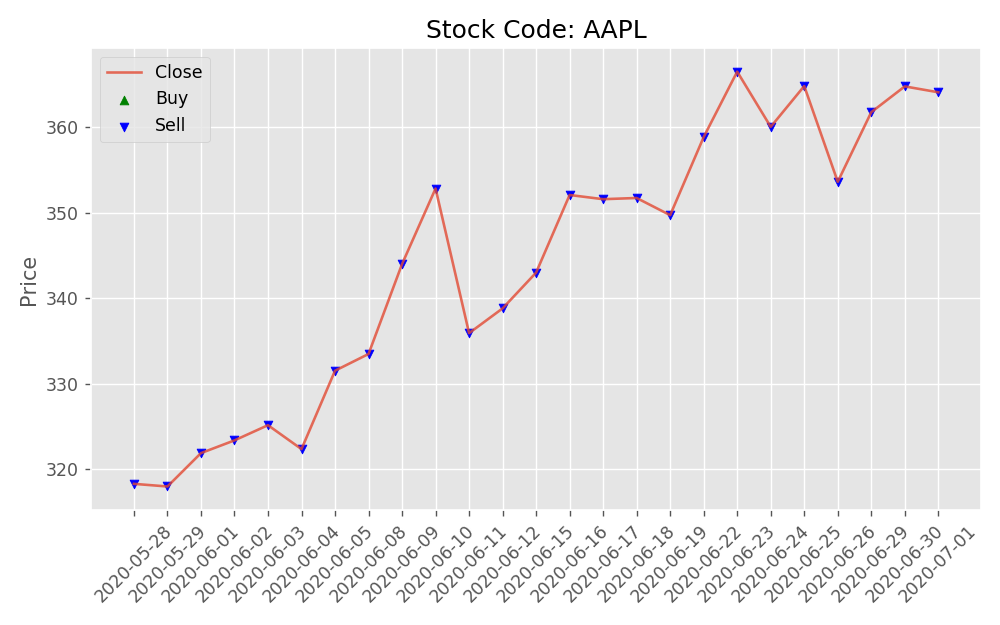

Input Stock Code : 
AAPL


In [29]:
plt.style.use('ggplot')
plt.ion()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlim(0,31)

identifier = input('Input Stock Code : \n')
initial_assets = 10000
portfolio = []

def animate(i):
    data = pd.read_csv('./Stock/raw_data/{}.csv'.format(identifier))    
    num = len(data)
    
    #get indicators
    bolingerband(data)
    dmi(data)
    macd(data)
    rsi(data)

    date_deque = deque(maxlen=25)
    open_deque = deque(maxlen=25)
    high_deque = deque(maxlen=25)
    low_deque = deque(maxlen=25)
    close_deque = deque(maxlen=25)
    volumn_deque = deque(maxlen=25)
    signal_deque = deque(maxlen=25)

    dates = data['Date'].values
    closes = data['Close'].values
    opens = data['Open'].values
    highes = data['High'].values
    lows = data['Low'].values
    volumns = data['Volume'].values

    for i in dates:
        date_deque.append(i)
    for i in closes:
        close_deque.append(i)
    for i in opens:
        open_deque.append(i)
    for i in highes:
        high_deque.append(i)
    for i in lows:
        low_deque.append(i)
    for i in volumns:
        volumn_deque.append(i)
    for i in lows:
        signal_deque.append(i)

    deque_df = pd.DataFrame(list(zip(date_deque,open_deque, high_deque, low_deque, close_deque, close_deque)),\
                            columns =['Date', 'Open', 'High', 'Low', 'Close', 'Volumn']) 

    deque_df['Buy'] = deque_df['Low'].apply(lambda x : 1 if x < 50 else (0 if x > 60 else 2))
    value = 50000

    plt.cla()
    plt.ylabel('Price')
    plt.title('Stock Code: {}'.format(identifier))
    
    plt.plot(deque_df['Date'].values, deque_df['Close'].values, alpha=0.8, label="Close")
    plt.legend(('Current Values : {}'.format(value)), 'lower right')
    
    #plot signal
    plt.scatter(deque_df.loc[deque_df['Buy'] ==1 , 'Date'].values,\
                deque_df.loc[deque_df['Buy'] ==1, 'Close'].values,\
                label='Buy', color='green', s=25, marker="^")
    
    plt.scatter(deque_df.loc[deque_df['Buy'] ==0 , 'Date'].values,\
                deque_df.loc[deque_df['Buy'] ==0, 'Close'].values,\
                label='Sell', color='blue', s=25, marker="v")
    
    
    
    plt.xticks(rotation=45)
    
    plt.legend(loc='upper left')
    plt.tight_layout()

In [30]:
ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
plt.show()